## MACE: Multi-Agent Chess Environment 

Cooperative multi-agent learning represents a formidable challenge within the realm of artificial intelligence research. This challenge becomes particularly evident in scenarios with high-dimensional environments where agents possess diverse capabilities and must adhere to specific rules while collaboratively learning from experts.

Chess offers a good toy example as agents representing different chess pieces have different capabilities and tasks. By working together collaboratively their individual skill set can be used to win against the opponent team. To do so each agent must be aware of the capabilities. Teaching agents their action spaces is the main goal of this project. 

Imitation learning emerges as a promising solution, allowing agents to acquire policies through the study of expert demonstrations in the absence of direct reward signals. This project presents a proof of proof of concept that combines single-agent imitation learning with the concept of shape learning within the context of Markov games. 

------


As the README explained, this is an example notebook to show the main functionality of the project, that can then be used to perform new sets of experiments. It is split into the following 
parts:
 
- **Phase 1**: Generating a dataset from existing games
- **Phase 2**: Training the agents 
- **Phase 3**: Evaluation of the trained agents


To get started, you first have to make sure you have all the required libraries installed (for example using *pip*). The project is setup with the following versions: 

- python 3.19.13
- matplotlib 3.8.0
- stockfish-3.28.0 #Info: add this to your python environment variables
- chess 1.10.0

In [1]:
#!pip install matplotlib
#!pip install stockfish 
#...

#!pip show matplotlib #see currently installed version 

Once all your libraries are installed, you have to change the PATH variable in the following cell to your local *dataset* folder

In [2]:
import random
import chess
import matplotlib.pyplot as plt
from Agent import Agent
from AgentCollection import AgentCollection
from ChessEnvironment import ChessEnvironment
from Experiment import Experiment
from main import train_net
from plotting import *
from SampleConverter import SampleConverter
from stockfish import Stockfish  

#PATH = "E:/.../dataset/"
PATH = "E:/HAW/Master/Grundprojekt/project/dataset/"


The following section sets up the agents and the environment. While the agent setup is static, you can adapt the training parameter and the stockfish bot to your wishes. 

In [3]:
agentCollection = AgentCollection()        
agentCollection.addAgent(Agent(chess.WHITE, chess.ROOK, chess.A1,10)) #Rook R
agentCollection.addAgent(Agent(chess.WHITE, chess.ROOK, chess.H1,10)) #Rook L
agentCollection.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.B1,10))  #Knight R
agentCollection.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.G1,10)) #Knight L 
agentCollection.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.C1,10))  #Bishop L
agentCollection.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.F1,10)) #Bishop R
agentCollection.addAgent(Agent(chess.WHITE, chess.KING, chess.E1,10)) #King  
agentCollection.addAgent(Agent(chess.WHITE, chess.QUEEN, chess.D1,10)) #Queen
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.A2,10))  #Pawn 1
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.B2,10))  #Pawn 2
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.C2,10))  #Pawn 3
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.D2,10))  #Pawn 4
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.E2,10))  #Pawn 5
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.F2,10))  #Pawn 6 
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.G2,10))  #Pawn 7
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.H2,10)) #Pawn 8       

agentCollection.addAgent(Agent(chess.BLACK, chess.ROOK, chess.A8))  #Rook R
agentCollection.addAgent(Agent(chess.BLACK, chess.ROOK, chess.H8))  #Rook L
agentCollection.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.B8)) #Knight R
agentCollection.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.G8)) #Knight L 
agentCollection.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.C8)) #Bishop L
agentCollection.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.F8)) #Bishop R
agentCollection.addAgent(Agent(chess.BLACK, chess.KING, chess.E8)) #King  
agentCollection.addAgent(Agent(chess.BLACK, chess.QUEEN, chess.D8)) #Queen
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.A7)) #Pawn 1
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.B7)) #Pawn 2
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.C7)) #Pawn 3
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.D7)) #Pawn 4
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.E7)) #Pawn 5
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.F7)) #Pawn 6 
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.G7)) #Pawn 7
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.H7)) #Pawn 8
    


### Phase 1: Generating a dataset from existing games

For later training using Imitation Learning first it is required to create a dataset.  In this case, the training dataset comprises a number of games of chess. Acquired from the LichessAPI a number of files are possible to use, that include varying number of games. Each game is denoted in the common algebraic notation. 

This could for example look like the following: 

    223662 2007.12.08 1/2-1/2 2516 2549 46 date_false result_false welo_false belo_false edate_false setup_false fen_false result2_false oyrange_false blen_false ### W1.d4 B1.e6 W2.c4 B2.d5 W3.Nc3 B3.c5 W4.cxd5 B4.exd5 W5.Nf3 B5.Nc6 W6.Bg5 B6.Be7 W7.Bxe7 B7.Ngxe7 W8.e3 B8.Qb6 W9.Qd2 B9.cxd4 W10.Nxd4 B10.Nxd4 W11.exd4 B11.O-O W12.Be2 B12.Nf5 W13.Rd1 B13.Be6 W14.O-O B14.Rac8 W15.Rfe1 B15.Qb4 W16.g3 B16.Rfd8 W17.Bf1 B17.Nd6 W18.Re5 B18.Nc4 W19.Bxc4 B19.dxc4 W20.d5 B20.Bh3 W21.Rde1 B21.h6 W22.Re7 B22.Be6 W23.R1xe6 B23.fxe6 

A helpful mini-tutorial into the notation can be found using this [link](https://www.chess.com/terms/chess-notation). 

The chess game is then split into individual movement actions. I distinguish between absolute and relative actions. An absolute movement specifies the origin and destination squares of an agent's move, allowing to differentiate between, for example, a rook moving from "A1" (square 0) to "A2" (square 8) and moving from "B1" to "B2." On the other hand, a relative action is denoted as a two-dimensional vector $(\Delta x, \Delta y)$ representing movement along the x-axis and y-axis.


Since in this case not single agent is trained to play the game of chess, each agent has to receive the adequate dataset for its local training. This means, that the movement of each chess piece is tracked during the game, so that only data regarding the movement of this chess piece (not the chess piece type) is added to the training data set. Each data sample consists of a representation of the current state $s$, the relative action *a* denoted through a 2D vector $(\Delta x, \Delta y)$, that has been performed and the following state $s+1$.  The state is represented as a 8x8 matrix, with each type of chess piece differentiated by piece type and color denoted as a unique integer, e.g., $P_{\text{white}}$ for a white pawn. *(s+1 is not used at the moment, but was added to prepare for other experiments.)*

The resulting dataset is divided into three parts: the first training generates the APF (action probability function), the second training set is used for training the CNN using imitation learning and the third set is used to evaluate the agents in the end. 


In [4]:
FILE ="03_sorted_100000.txt" 
#or: 
# - 03_sorted_1000.txt
# - 03_sorted_5000.txt
# - 03_sorted_100000.txt

The following cell creates the data set for each agents and gives an example of the amount of games and samples considered using the selected file. 

In [5]:

sampleConv = SampleConverter(agentCollection) 
print("--> Starting to read dataset <-- ")
sampleConv.read_dataset(PATH + FILE)    
print("--> Created dataset <-- ")

for agent in agentCollection.allAgents: 
    random.shuffle(agent.dataset)
    i = int(len(agent.dataset)/3)
    agent.trainAPF = agent.dataset[:i]
    agent.trainNet = agent.dataset[i:2*i]
    agent.test = agent.dataset[2*i:3*i]
    agent.dataset = [] 

white_agents = agentCollection.getAgentsByColor(True)

print("Considered "   + str(sampleConv.total_games) + " games")
print("Example: White rook (A1) has " + str(len(agentCollection.getAgentAtStartingPosition(chess.A1).trainAPF)*3) + " samples in its dataset")
print("Example: White pawn (D2) has " + str(len(agentCollection.getAgentAtStartingPosition(chess.D2).trainAPF)*3) + " samples in its dataset")

--> Starting to read dataset <-- 


--> Created dataset <-- 
Considered 592 games
Example: White rook (A1) has 1038 samples in its dataset
Example: White pawn (D2) has 666 samples in its dataset


Before starting the second phase, it is already possible to obtain some statistical information about the different agents. 

For instance, I denote the "action probability function" as $\mathcal{APF}(\vec{a})$. This function calculates the distribution of each individual relative action $\vec{a}$, without yet considering the corresponding state space. It can be visualized as a histogram like this:


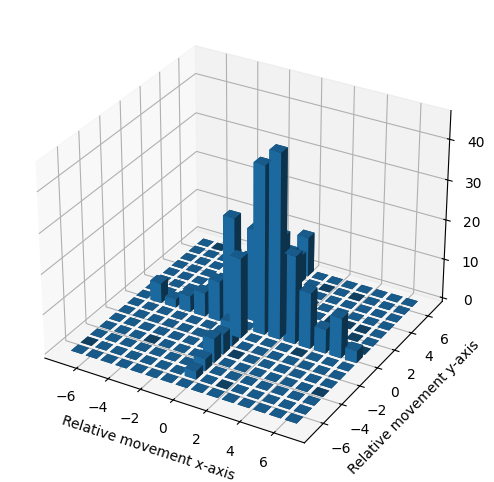

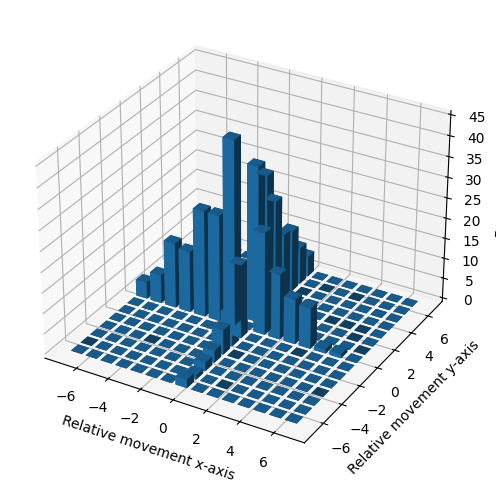

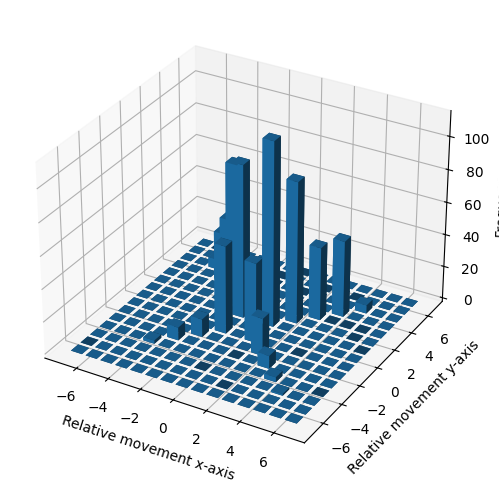

In [6]:
plot_APF([agentCollection.getAgentAtStartingPosition(chess.A1)]) #rook left
plot_APF([agentCollection.getAgentAtStartingPosition(chess.H1)]) #rookt right

#you can also create an accumulation of agents of e.g. a specific type: 

bishops = [agentCollection.getAgentAtStartingPosition(chess.C1), agentCollection.getAgentAtStartingPosition(chess.F1)]
plot_APF(bishops)


## Phase 2: Training the agents

During the next phase the agents will now learn to which action to perform in which situation. Therefore the following training flow is used: 

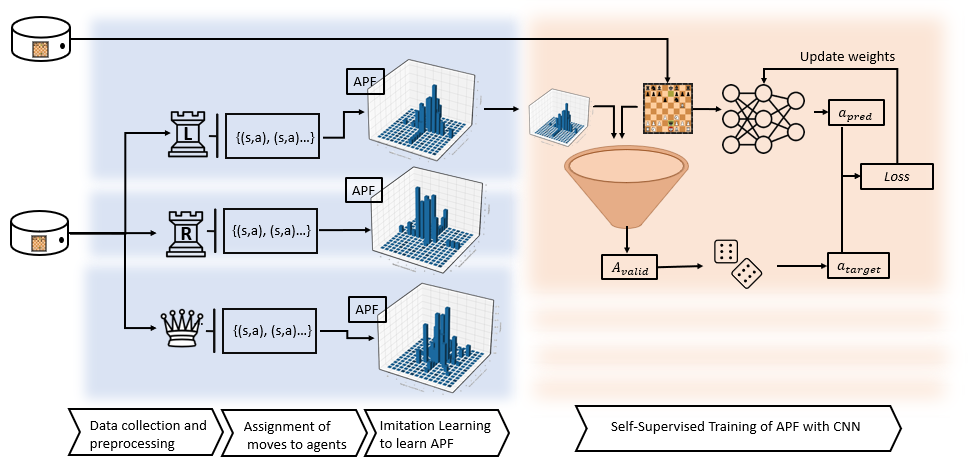






On the left side, depicted in blue, is the visualization of the first training phase. 
In **phase 1** multiple chess games were utilized to construct a dataset for each agent, encompassing all scenarios in which the specific agent executed actions. These relative actions are aggregated to form the Action Probability Function (APF), which plays a crucial role in the second training phase involving the Convolutional Neural Network (CNN). 
Now the agent is capable of knowing which finite set of action it can perform and in which general distribution they appear. However it has no relation to the specific state of the game yet. The step is done to significantly reduce the action space and also to avoid selecting action that are not valid, which hopefully make the learning environment more stable.


In the **second phase**, it is now necessary to transform the static APF to a more dynamic function - in this case by using a neural network. This is done in the following manner. We select a random state from the dataset, in which the agent we are currently training is able to perform at least one action. We then sample an action from the valid actions $A_{valid}$ and use this as the label for the supervised learning. We give the state as an input into the neural network. In this case a CNN is used, as it hopefully is more capable to draw knowledge not only from the data but also their positional relationship. The CNN then proposes an action $a_{pred}$. We calculate the loss using sparse categorical cross-entropy and update the neural network accordingly. When each sample is used in training so often, as the amount of EPISODES specifies, a new ROUND starts. In each round the labelling process is repeated to ensure that the APF distribution is cloned in the dataset as good as possible. 

The goal of transferring the APF to a CNN is one the one hand to select actions considering the current state. But the second reason is, that when in a later project training the agents collectively it is still possible to locally adapt to change. 

In [7]:
#training parameters 

EPISODES = 30 #amount of times each sample is presented to the agent before relabeling
ROUNDS = 30 #amount of times the dataset gets relabeled

#chess bot (stockfish) difficulty 
DEPTH = 10 #counter of iterative deepening loop at the root of the game tree
SKILL_LEVEL = 5 #0 is lowest, 20 is highest

env = ChessEnvironment(agentCollection, min_appear=1)
print("--> Finished setting up ChessEnvironment <-- ")

print("--> Setting up StockfishBot <-- ")
stockfish=Stockfish("stockfish-windows-x86-64-modern") #you might have to change the stockfish bot depending on your operating system 
stockfish.set_depth(DEPTH)
stockfish.set_skill_level(SKILL_LEVEL)


--> Finished setting up ChessEnvironment <-- 
--> Setting up StockfishBot <-- 


Now we train all agents of the white team after each training set (before relabeling the dataset) we play against the chess bot to see their performance over time. 

*The warnings of the train_function and test_function can be ignored.*

In [8]:

for agent in white_agents: 
    agent.reset_training(ROUNDS)

history = dict()
for i in range(ROUNDS):
    for agent in white_agents: 
        new_history = train_net(agent, EPISODES)
        if agent.starting_position not in history.keys():
            history[agent.starting_position] = dict()
            history[agent.starting_position]["loss"] = new_history["loss"]
            history[agent.starting_position]["val_loss"] = new_history["val_loss"]
            history[agent.starting_position]["accuracy"] = new_history["accuracy"]
            history[agent.starting_position]["val_accuracy"] = new_history["val_accuracy"]
        else:
            history[agent.starting_position]["loss"] += new_history["loss"]
            history[agent.starting_position]["val_loss"] += new_history["val_loss"]
            history[agent.starting_position]["accuracy"] += new_history["accuracy"]
            history[agent.starting_position]["val_accuracy"] += new_history["val_accuracy"]
        
    env.play_against_bot(i, stockfish)
    print("Round ", str(i), " completed")

1/1 [==============================] - 0s 22ms/step
True 1 pre_select: 0 total options: 1 total steps:  25 checkmate:  False is_game_over False
Round  0  completed
1/1 [==============================] - 0s 18ms/step
True 2 pre_select: 0 total options: 3 total steps:  27 checkmate:  False is_game_over False
Round  1  completed
1/1 [==============================] - 0s 24ms/step
True 1 pre_select: 0 total options: 1 total steps:  9 checkmate:  False is_game_over False
Round  2  completed
1/1 [==============================] - 0s 14ms/step
True 1 pre_select: 0 total options: 2 total steps:  31 checkmate:  False is_game_over False
Round  3  completed
1/1 [==============================] - 0s 8ms/step
True 0 pre_select: 0 total options: 0 total steps:  31 checkmate:  True is_game_over True
Round  4  completed
1/1 [==============================] - 0s 31ms/step
True 1 pre_select: 0 total options: 3 total steps:  21 checkmate:  False is_game_over False
Round  5  completed
1/1 [===============

## Phase 3: Evaluating of the trained agents

At last it is possible to now look into the different statistics that have been collected during the training phase as well as the games played against the bot. 

You now have different options to visualize the results. A few of them are shown here: 

- **plot_errors_individually**: visualizes the error rate of individual agents after each training round. The error rate is defined as the relative number of times an action was suggested, that the agent can not perform in the current state 
- **plot_error_grouped**: visualizes the accumulated error rate of groups of agents, which can for example be used to compare teams of agents that have been trained for different amount of times 
- **plot_histograms**: visualizes the APF before training and then samples from the test dataset and calculates the current APF. This can the be used to compare how well the agent learned to copy the distribution. Additionally it is printed how many suggestions the agent made using the test set and how many were valid. 

There are more plotting options like **plot_metrics**, that shows the loss and accuracy of the CNN during training and validation, but the three ones above have been selected to show the most relevant and interpretable information. 

Below you find an example on how to use these methods: 

In [9]:

def plot_metrics(history, rounds, interval=1 ):
    # Plot training & validation loss values
    fig = plt.figure(figsize=(12,4))  # Adjust the figure size as needed
    plt.subplot(1, 2, 1)  # Create the first subplot


    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Training step (total: rounds*epochs)')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.xticks(range(1,rounds+1,interval))
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)  # Create the second subplot
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Training step (total: rounds*epochs)')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.xticks(range(1,rounds+1,interval))
    
    plt.show()

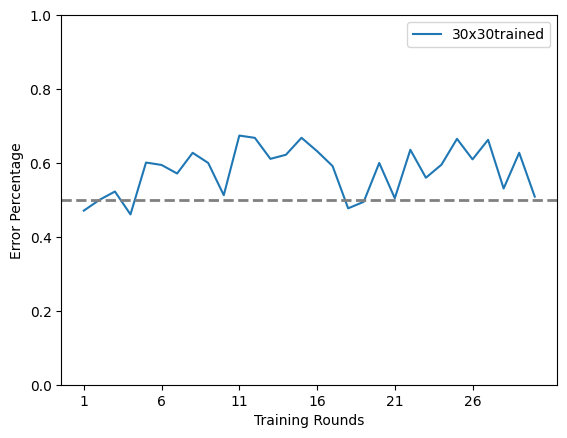

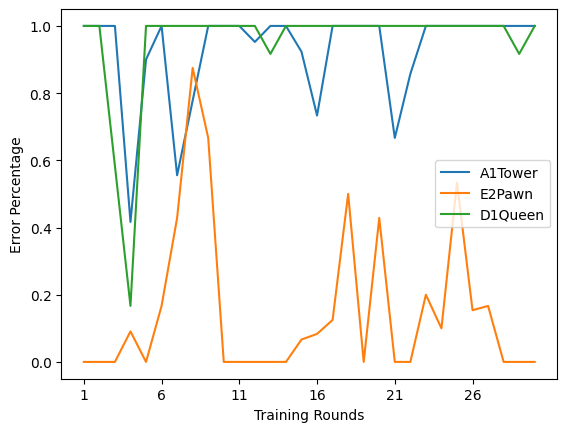

11/11 [==============================] - 0s 2ms/step
0  made  108  correct out of  346 total suggestions


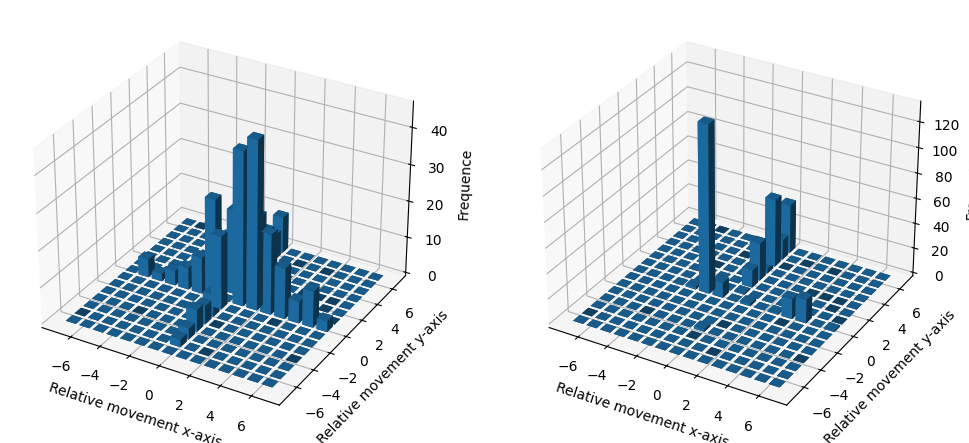

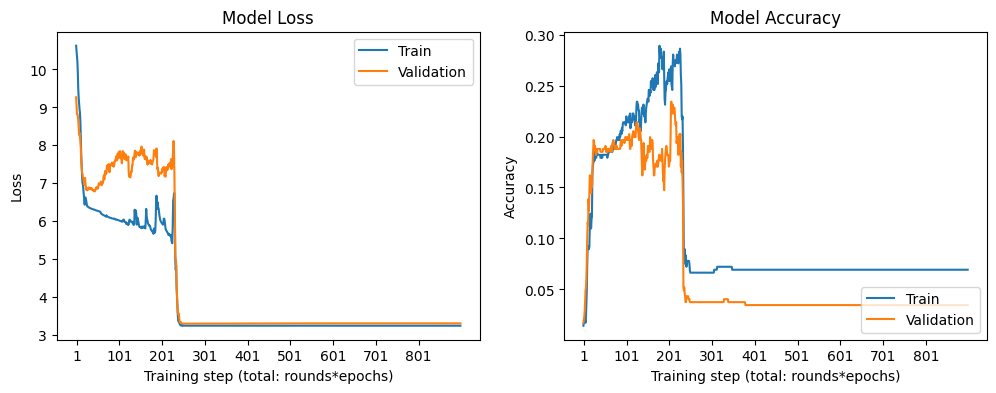

In [19]:

agents_to_show = [agentCollection.getAgentAtStartingPosition(chess.A1), agentCollection.getAgentAtStartingPosition(chess.E2), agentCollection.getAgentAtStartingPosition(chess.D1)]
plot_errors_grouped(white_agents, ["30x30trained"],ROUNDS, 5)
plot_errors_individually(agents_to_show, ["A1Tower", "E2Pawn", "D1Queen"], ROUNDS,5)
plot_histograms(agentCollection.getAgentAtStartingPosition(chess.A1))

plot_metrics(history[chess.A1],EPISODES*ROUNDS,100) 
